In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [2]:
resampled_dir = "../data/resampled"
resampled_file_path = os.path.join(resampled_dir, "usdjpy-bar-test-2020-01-01-2024-12-31.pkl")

In [3]:
df = pd.read_pickle(resampled_file_path)
df.head()

,timestamp,open,high,low,close,volume
0,2020-01-01 22:00:00,108.7580,108.7600,108.7580,108.7590,9179.999948
1,2020-01-01 22:01:00,108.7570,108.7590,108.7495,108.7495,13300.000012
2,2020-01-01 22:02:00,108.7495,108.7535,108.7495,108.7535,4500.000000
3,2020-01-01 22:03:00,108.7540,108.7555,108.7535,108.7555,10490.000010
4,2020-01-01 22:04:00,108.7575,108.7650,108.7555,108.7650,11600.000024


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2020-01-01 22:00:00,108.7580,108.7600,108.7580,108.7590,9179.999948
2020-01-01 22:01:00,108.7570,108.7590,108.7495,108.7495,13300.000012
2020-01-01 22:02:00,108.7495,108.7535,108.7495,108.7535,4500.000000
2020-01-01 22:03:00,108.7540,108.7555,108.7535,108.7555,10490.000010
2020-01-01 22:04:00,108.7575,108.7650,108.7555,108.7650,11600.000024


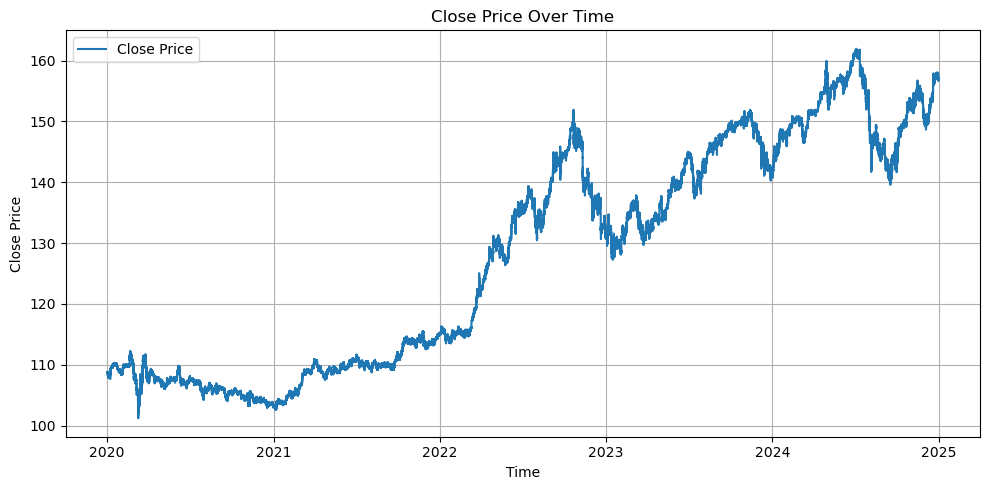

In [5]:
# Plot Close price
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close'], linestyle='-', label='Close Price')

# Improve formatting
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

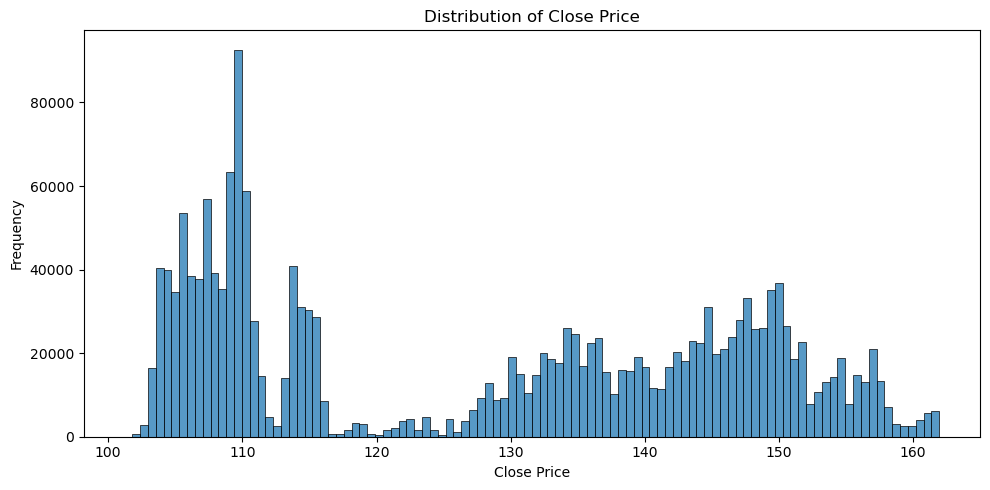

In [6]:
import seaborn as sns

# Create a copy to avoid modifying the original
df_copy = df.copy()

# Plot distribution of 'close' column
plt.figure(figsize=(10, 5))
sns.histplot(df_copy['close'])
plt.title("Distribution of Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

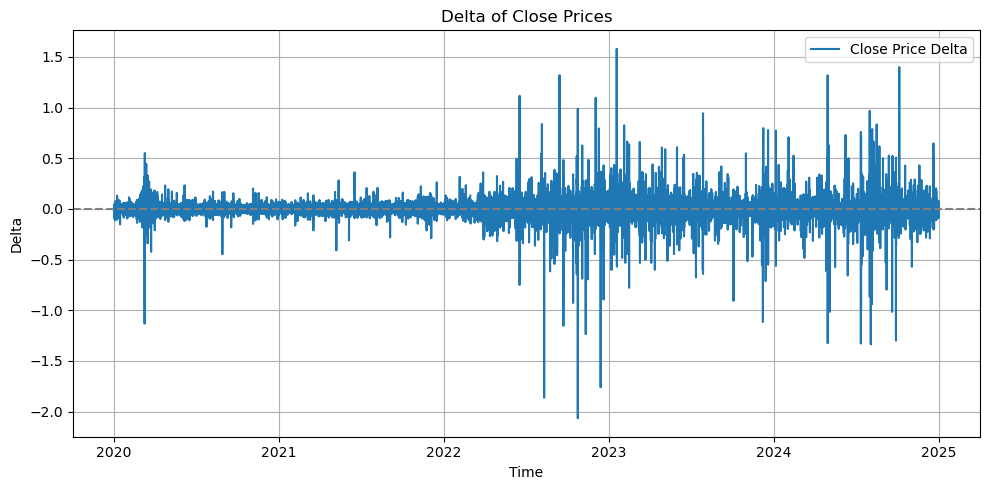

In [7]:
# Calculate close price delta
df['close_delta'] = df['close'].diff()

# Plot the delta
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close_delta'], label='Close Price Delta')
plt.axhline(0, color='gray', linestyle='--')  # zero line
plt.title('Delta of Close Prices')
plt.xlabel('Time')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

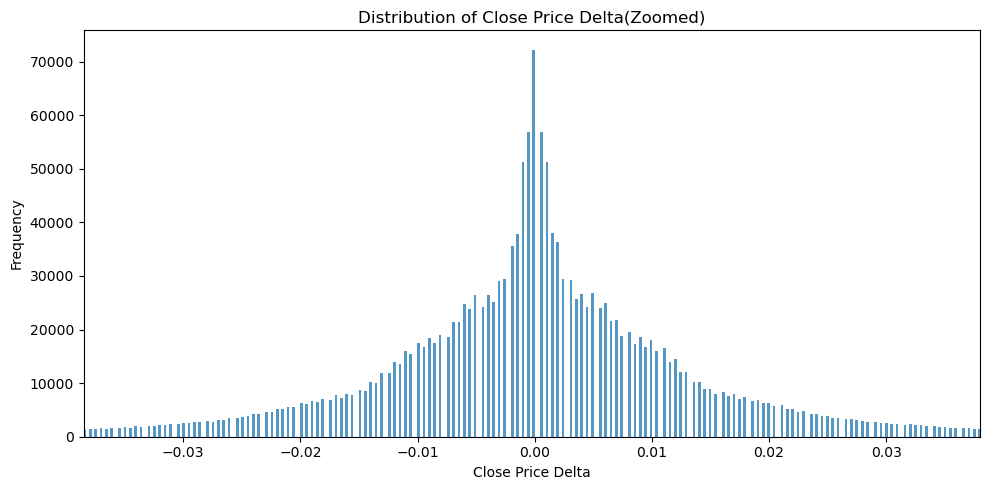

In [8]:
df_copy = df.copy()

low, high = df_copy['close_delta'].quantile([0.025, 0.975])  # 95% range

plt.figure(figsize=(10, 5))
sns.histplot(df_copy['close_delta'])
plt.title("Distribution of Close Price Delta(Zoomed)")
plt.xlabel("Close Price Delta")
plt.ylabel("Frequency")
plt.xlim(low, high)
plt.tight_layout()
plt.show()

C:\Users\yoyo\AppData\Local\Temp\ipykernel_20400\1434940568.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['close_pct_change'] = df['close'].pct_change() * 100  # Multiply by 100 to get percentage


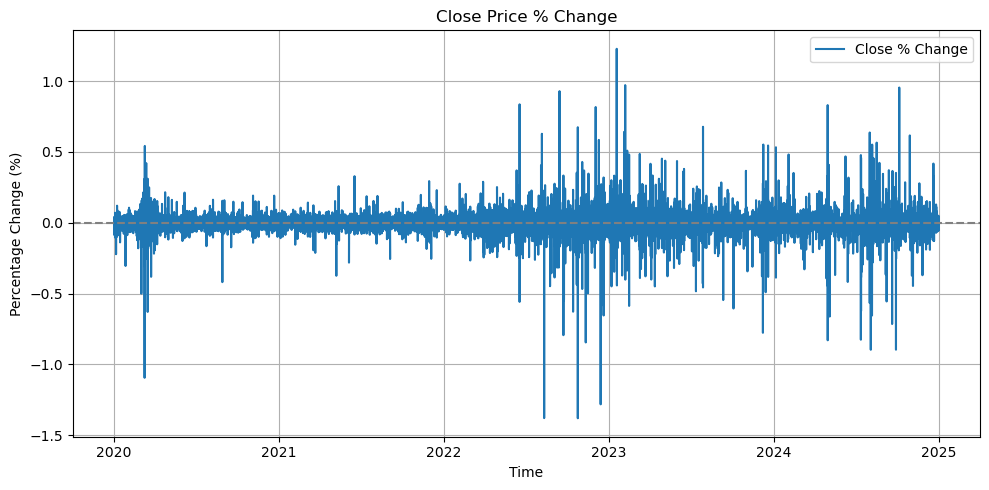

In [9]:
df['close_pct_change'] = df['close'].pct_change() * 100  # Multiply by 100 to get percentage

# Plot percentage change
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close_pct_change'], linestyle='-', label='Close % Change')
plt.axhline(0, color='gray', linestyle='--')

# Formatting
plt.title('Close Price % Change')
plt.xlabel('Time')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

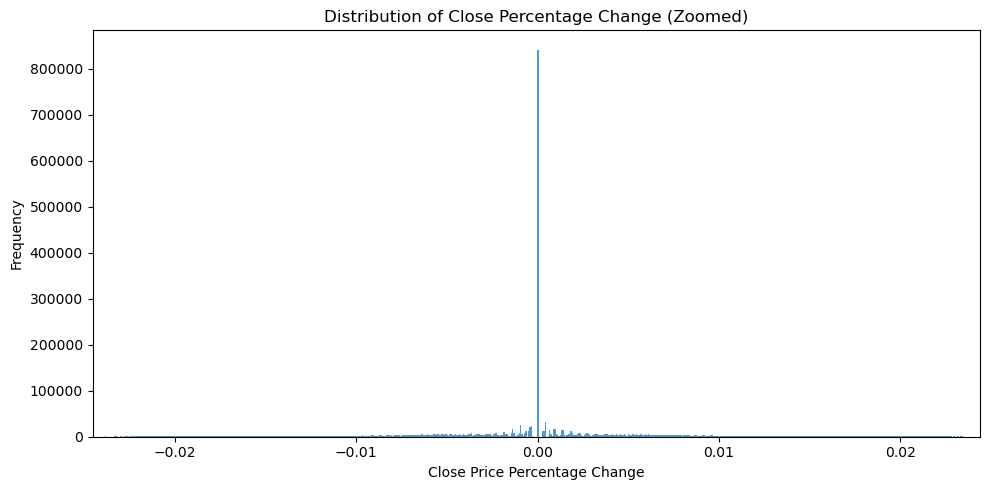

In [10]:
df_copy = df.copy()

low, high = df_copy['close_pct_change'].quantile([0.025, 0.975])  # 95% range

plt.figure(figsize=(10, 5))
sns.histplot(df_copy['close_pct_change'])
plt.title("Distribution of Close Percentage Change (Zoomed)")
plt.xlabel("Close Price Percentage Change")
plt.ylabel("Frequency")
plt.xlim(low, high)
plt.tight_layout()
plt.show()



In [11]:
df[-100:]

,open,high,low,close,volume,close_delta,close_pct_change
timestamp,,,,,,,
2024-12-30 22:20:00,156.8755,156.8755,156.8755,156.8755,2400.000095,0.0025,0.001594
2024-12-30 22:21:00,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
2024-12-30 22:22:00,156.8750,156.8750,156.8750,156.8750,2400.000095,NaN,-0.000319
2024-12-30 22:23:00,156.8745,156.8745,156.8725,156.8725,5100.000024,-0.0025,-0.001594
2024-12-30 22:24:00,156.8730,156.8740,156.8730,156.8740,10199.999809,0.0015,0.000956
...,...,...,...,...,...,...,...
2024-12-30 23:55:00,157.0100,157.0110,157.0075,157.0080,206939.997196,-0.0045,-0.002866
2024-12-30 23:56:00,157.0075,157.0090,157.0075,157.0075,127200.000405,-0.0005,-0.000318
2024-12-30 23:57:00,157.0035,157.0095,156.9900,157.0070,234090.000987,-0.0005,-0.000318


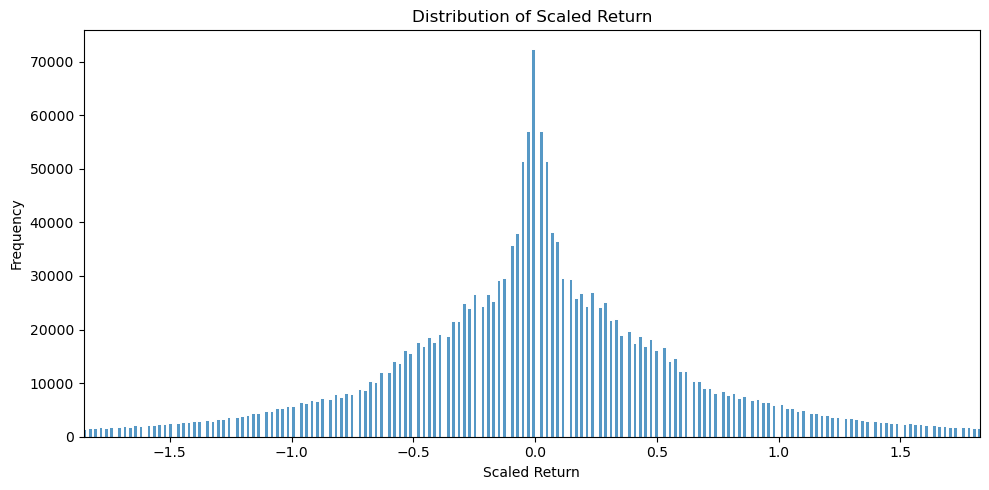

In [12]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Fit and transform the selected column(s)
df_copy["scaled_return"] = scaler.fit_transform(df_copy[["close_delta"]])

low, high = df_copy['scaled_return'].quantile([0.025, 0.975])  # 95% range

plt.figure(figsize=(10, 5))
sns.histplot(df_copy['scaled_return'])
plt.title("Distribution of Scaled Return")
plt.xlabel("Scaled Return")
plt.ylabel("Frequency")
plt.xlim(low, high)
plt.tight_layout()
plt.show()

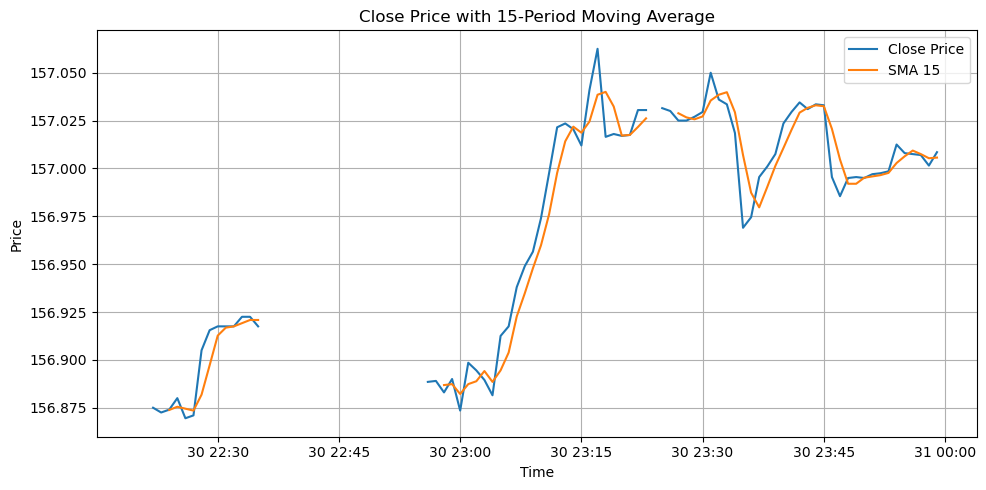

In [13]:
# Calculate 15-period Simple Moving Average
df['sma_15'] = df['close'].rolling(window=3).mean()
df_filtered = df.tail(100)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered['close'], label='Close Price')
plt.plot(df_filtered.index, df_filtered['sma_15'], label='SMA 15')

# Formatting
plt.title('Close Price with 15-Period Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

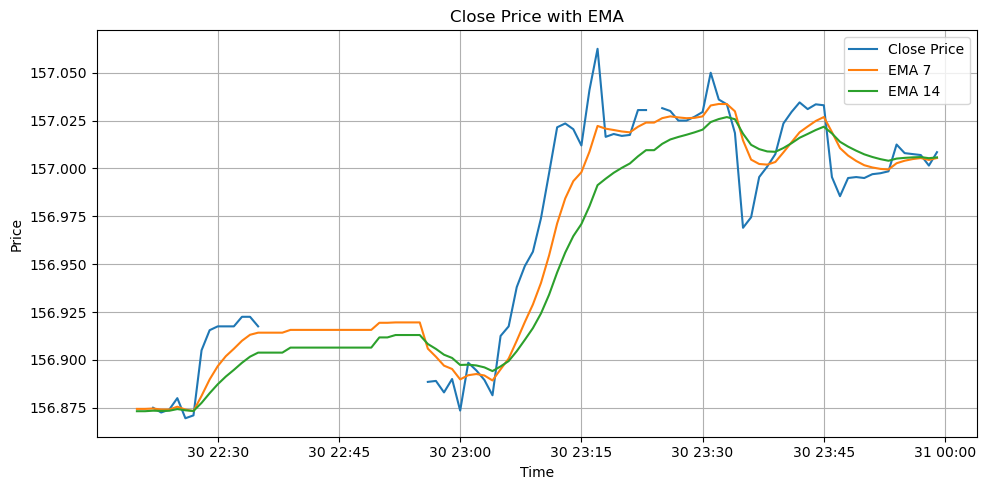

In [14]:
df["ema7"] = df["close"].ewm(span=7, adjust=False).mean()
df["ema14"] = df["close"].ewm(span=14, adjust=False).mean()

df_filtered = df.tail(100)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered['close'], label='Close Price')
plt.plot(df_filtered.index, df_filtered['ema7'], label='EMA 7')
plt.plot(df_filtered.index, df_filtered['ema14'], label='EMA 14')

# Formatting
plt.title('Close Price with EMA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

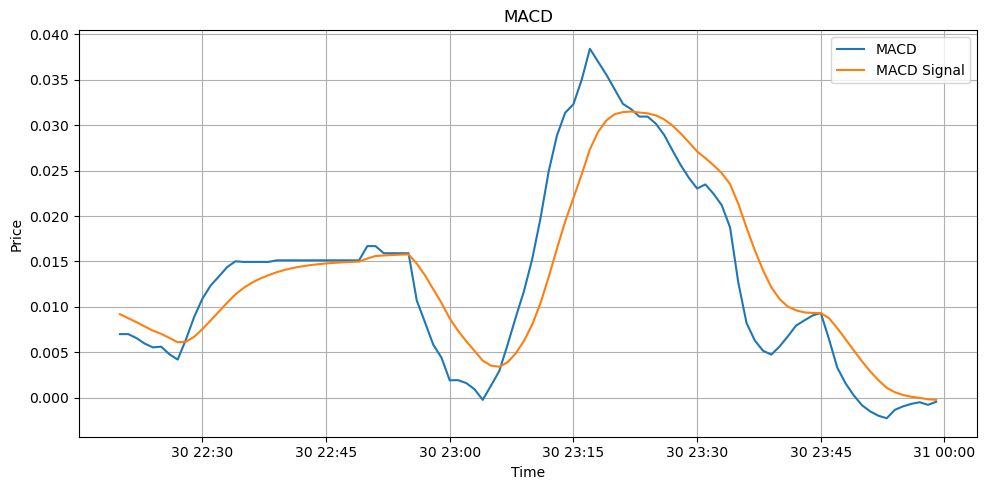

In [15]:
# Compute MACD and Signal
ema_fast = df["close"].ewm(span=12, adjust=False).mean()
ema_slow = df["close"].ewm(span=26, adjust=False).mean()
df["macd"] = ema_fast - ema_slow
df["macd_signal"] = df["macd"].ewm(span=9, adjust=False).mean()

df_filtered = df.tail(100)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered['macd'], label='MACD')
plt.plot(df_filtered.index, df_filtered['macd_signal'], label='MACD Signal')

# Formatting
plt.title('MACD')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

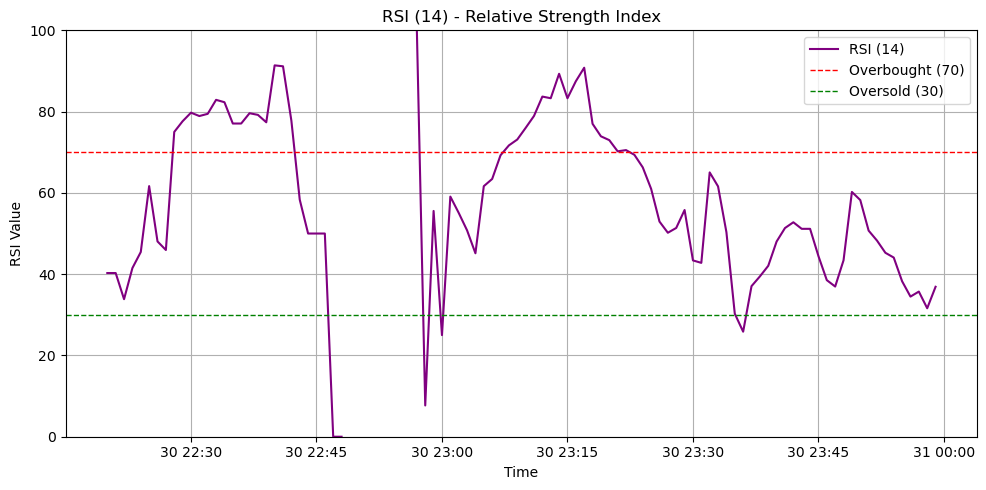

In [16]:
window = 14
delta = df['close'].diff()

gain = delta.where(delta > 0, 0).rolling(window=window).mean()
loss = -delta.where(delta < 0, 0).rolling(window=window).mean()

rs = gain / loss
df['rsi_14'] = 100 - (100 / (1 + rs))
df_filtered = df.tail(100)
# --- Plot RSI ---
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered['rsi_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')

plt.title('RSI (14) - Relative Strength Index')
plt.xlabel('Time')
plt.ylabel('RSI Value')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_delta',
       'close_pct_change', 'sma_15', 'ema7', 'ema14', 'macd', 'macd_signal',
       'rsi_14'],
      dtype='object')

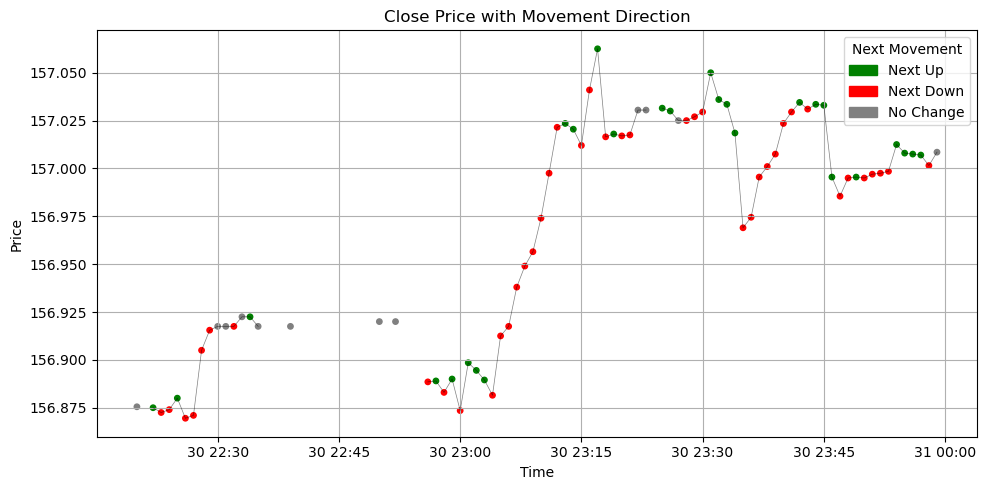

In [18]:
import matplotlib.patches as mpatches


# Calculate next movement direction
df['direction'] = df['close'].diff(periods=-1).apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_filtered = df.tail(100)

# Plot
plt.figure(figsize=(10, 5))

# Color map
colors = df_filtered['direction'].map({1: 'green', -1: 'red', 0: 'gray'})

# Plot scatter and line
plt.scatter(df_filtered.index, df_filtered['close'], c=colors, s=15)
plt.plot(df_filtered.index, df_filtered['close'], color='black', linewidth=0.5, alpha=0.5)

# Create manual legend
legend_patches = [
    mpatches.Patch(color='green', label='Next Up'),
    mpatches.Patch(color='red', label='Next Down'),
    mpatches.Patch(color='gray', label='No Change'),
]
plt.legend(handles=legend_patches, title='Next Movement')

# Final formatting
plt.title('Close Price with Movement Direction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

direction
-1    121834
 1    118852
 0    118030
Name: count, dtype: int64


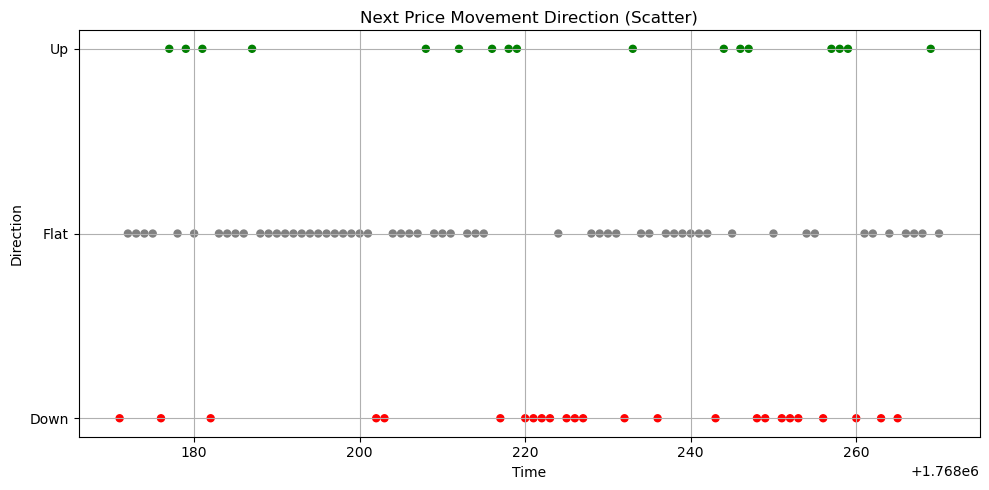

In [27]:
# Make sure direction is calculated

threshold = 0.005
df["direction"] =  df['close'].diff(periods=-1).apply(lambda x: 1 if x > threshold else (-1 if x < -threshold else 0))
direction_counts = df['direction'].value_counts()
print(direction_counts)
df_filtered = df.tail(100)

# Map colors
colors = df_filtered['direction'].map({1: 'green', -1: 'red', 0: 'gray'})

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered.index, df_filtered['direction'], c=colors, s=25)

# Y-axis setup
plt.yticks([-1, 0, 1], ['Down', 'Flat', 'Up'])
plt.title('Next Price Movement Direction (Scatter)')
plt.xlabel('Time')
plt.ylabel('Direction')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
df = df.reset_index()
df['timestamp'] = df['timestamp'].apply(lambda x: x.timestamp())

In [21]:
df.head()

,timestamp,open,high,low,close,volume,close_delta,close_pct_change,sma_15,ema7,ema14,macd,macd_signal,rsi_14,direction
0,1.577916e+09,108.7580,108.7600,108.7580,108.7590,9179.999948,NaN,NaN,NaN,108.759000,108.759000,0.000000,0.000000,NaN,1
1,1.577916e+09,108.7570,108.7590,108.7495,108.7495,13300.000012,-0.0095,-0.008735,NaN,108.756625,108.757733,-0.000758,-0.000152,NaN,0
2,1.577916e+09,108.7495,108.7535,108.7495,108.7535,4500.000000,0.0040,0.003678,108.754000,108.755844,108.757169,-0.001024,-0.000326,NaN,0
3,1.577916e+09,108.7540,108.7555,108.7535,108.7555,10490.000010,0.0020,0.001839,108.752833,108.755758,108.756946,-0.001061,-0.000473,NaN,-1
4,1.577916e+09,108.7575,108.7650,108.7555,108.7650,11600.000024,0.0095,0.008735,108.758000,108.758068,108.758020,-0.000320,-0.000442,NaN,-1


processed_data_dir = "../data/processed"
processed_file_name = "usdjpy-bar-processed-2020-01-01-2024-12-31.csv"
processed_file_path = os.path.join(processed_data_dir, processed_file_name)
df.to_csv(processed_file_path)

In [22]:
df.isna().sum()


timestamp                0
open                767480
high                767480
low                 767480
close               767480
volume                   0
close_delta         774855
close_pct_change         1
sma_15              781460
ema7                     0
ema14                    0
macd                     0
macd_signal              0
rsi_14              754802
direction                0
dtype: int64

In [23]:
PROCESSED_PATH='../data/processed/usd-jpy-2024.pkl'

In [24]:
df = pd.read_pickle(PROCESSED_PATH)
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,avg_spread,tick_count,close_delta,...,rsi,macd,macd_signal,macd_hist,bb_middle,bb_std,bb_upper,bb_lower,atr,dt
1409555,1409555,2024-01-01 22:00:20.059000+00:00,141.0210,141.0305,141.0165,141.0305,41399.998903,0.091143,14,0.0090,...,50.452489,-0.002130,-0.001902,-0.000228,141.032250,0.011966,141.056182,141.008318,0.024786,2024-01-01 22:00:20.059000+00:00
1409556,1409556,2024-01-01 22:02:58.052000+00:00,140.8730,140.8730,140.8695,140.8720,9199.999809,0.045667,6,-0.1585,...,27.860027,-0.014800,-0.004482,-0.010318,141.020500,0.044368,141.109236,140.931764,0.035179,2024-01-01 22:02:58.052000+00:00
1409557,1409557,2024-01-01 22:05:59.129000+00:00,140.8705,140.8705,140.8655,140.8655,2799.999952,0.046000,2,-0.0065,...,27.636849,-0.025077,-0.008601,-0.016476,141.008536,0.060419,141.129373,140.887699,0.034893,2024-01-01 22:05:59.129000+00:00
1409558,1409558,2024-01-01 22:10:02.849000+00:00,140.8660,140.8670,140.8660,140.8670,4200.000048,0.050000,2,0.0015,...,26.458616,-0.032723,-0.013425,-0.019298,140.996143,0.070337,141.136818,140.855468,0.034036,2024-01-01 22:10:02.849000+00:00
1409559,1409559,2024-01-01 22:11:16.551000+00:00,140.8700,140.8845,140.8700,140.8845,13500.000000,0.029667,6,0.0175,...,30.831099,-0.036944,-0.018129,-0.018815,140.985929,0.075618,141.137165,140.834692,0.032964,2024-01-01 22:11:16.551000+00:00
